# 1. Développez un chatbot pour réserver des vacances

<img src='https://user.oc-static.com/upload/2019/10/24/15719199766568_Capture%20d%E2%80%99e%CC%81cran%202019-10-24%20a%CC%80%2014.14.41.png'>


Fly Me est une agence qui propose des voyages clé en main pour les particuliers ou les professionnels. 
 

Fly Me a lancé un projet ambitieux de développement d’un chatbot pour aider les utilisateurs à choisir une offre de voyage.

La première étape de ce projet est de construire un MVP qui aidera les employés de Fly Me à réserver facilement un billet d’avion pour leurs vacances.

Comme ce projet est itératif, nous avons limité les fonctionnalités de la V1 du chatbot. La V1 devra pouvoir identifier dans la demande de l’utilisateur les cinq éléments suivants :

- Ville de départ
- Ville de destination
- Date aller souhaitée du vol
- Date retour souhaitée du vol
- Budget maximum pour le prix total des billets

# 2. Observation du jeu de données

Pour la construction de notre bot nous utiliserons le jeu de données [Frames Dataset](https://www.microsoft.com/en-us/research/project/frames-dataset/download/) proposé par Microsoft.

Dans cette parties nous analiserons la constitution d'un tel jeu de données puis nous traiterons cette donnée en vue de son utilisation pour la construction d'un modèle LUIS.

In [1]:
import pandas as pd
import numpy as np
import json

with open('./frames/frames.json') as f:
    df = json.load(f)
    
    
print(f'Le jeu de données contient {len(df)} conversations entre bot & utilisateur.')
df = [df[n] for n in range(len(df)) if n !=89 and n !=391]

Le jeu de données contient 1369 conversations entre bot & utilisateur.


Observons les échanges et les informations relatives à la premières conversation du jeu de données.

In [2]:
df[0]

{'user_id': 'U22HTHYNP',
 'turns': [{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
   'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'active_frame': 1,
    'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
 

In [3]:
print(df[0].keys())
print()
print('user_id :', df[0]['user_id'])
print("wizard_id :", df[0]['wizard_id'])
print("id :", df[0]['id'])
print('labels :', df[0]['labels'])

dict_keys(['user_id', 'turns', 'wizard_id', 'id', 'labels'])

user_id : U22HTHYNP
wizard_id : U21DKG18C
id : e2c0fc6c-2134-4891-8353-ef16d8412c9a
labels : {'userSurveyRating': 4.0, 'wizardSurveyTaskSuccessful': True}


Le premier élément du jeu de données est un dictionnaire contenant 5 clés :
- user_id : L'identifiant de l'utilisateur,
- turns : les échanges entre l'utilisateur et le bot
- wizard_id : l'identifiant du bot
- id : l'identifiant de la conversation
- labels : les métadonnées du bot

Observons à présent les données contenus pour la clée 'turns' de ce premier dictionnaire relatif à la première conversation du jeu de données.

In [4]:
print(f"La première conversation contient {len(df[0]['turns'])} échanges.")

[(u['author'],u['text']) for u in df[0]['turns']]

La première conversation contient 7 échanges.


[('user',
  "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."),
 ('wizard',
  'Hi...I checked a few options for you, and unfortunately, we do not currently have any trips that meet this criteria.  Would you like to book an alternate travel option?'),
 ('user',
  'Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.'),
 ('wizard',
  'I checked the availability for this date and there were no trips available.  Would you like to select some alternate dates?'),
 ('user',
  'I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?'),
 ('wizard',
  'I checked the availability for that date and there were no trips available.  Would you like to select some alternate dates?'),
 ('user',
  "I suppose I'll speak with my husband to see if we can choose other dates, and then I'll come back to you.Thanks for your he

La données contenue dans la clée "turns" est une liste de dictionnaires. chaque dictionnaire de cette liste contient les informations relatives aux échange entre le bot et l'utilisateur.

Voyons à présent les données du première échange.

In [5]:
df[0]['turns'][0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

In [6]:
print('Les clés du dictionnaire "turns" :', df[0]['turns'][0].keys())
print()

print('author :', df[0]['turns'][0]['author'])
print('timestamp :', df[0]['turns'][0]['timestamp'])
print('text :',df[0]['turns'][0]['text'])
print('labels :')
df[0]['turns'][0]['labels']

Les clés du dictionnaire "turns" : dict_keys(['text', 'labels', 'author', 'timestamp'])

author : user
timestamp : 1471272019730.0
text : I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.
labels :


{'acts': [{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
   'name': 'inform'},
  {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
    {'val': 'Caprica', 'key': 'or_city'},
    {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
    {'val': '8', 'key': 'n_adults'},
    {'val': '1700', 'key': 'budget'}],
   'name': 'inform'}],
 'active_frame': 1,
 'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
    'budget': [{'val': '1700.0', 'negated': False}],
    'dst_city': [{'val': 'Atlantis', 'negated': False}],
    'or_city': [{'val': 'Caprica', 'negated': False}],
    'str_date': [{'val': 'august 13', 'negated': False}],
    'n_adults': 

Nous observons la donnée contenue dans la clée 'labels' les information relatives aux intention et entités.

L'intentions est un élément utilisé dans le cadre du service [Language Understanding](https://azure.microsoft.com/fr-fr/services/cognitive-services/conversational-language-understanding/#overview) proposé par Microsoft Azure. Il permet au bot de déterminer l'objet de la conversation à savoir la réservation d'un vol.

L'entité quant à elle, permet de reperer le label contenu dans la phrase et qui corresponds aux informations essentielles à la réservation du vol qui sont, comme vu précédement :
- La ville de départ
- La ville de destination
- La date aller souhaitée du vol
- La date retour souhaitée du vol
- Le budget maximum pour le prix total des billets

A noter que les données diffèrent en fonction de l'identité de l'auteur du message, utilisateur ou bot.

In [7]:
print('Clés du dictionnaire relatif au messafe du bot :', df[0]['turns'][1].keys())
print()
print('author :', df[0]['turns'][1]['author'])
print('timestamp :', df[0]['turns'][1]['timestamp'])
print('labels :')
df[0]['turns'][1]['labels']

Clés du dictionnaire relatif au messafe du bot : dict_keys(['db', 'text', 'labels', 'author', 'timestamp'])

author : wizard
timestamp : 1471272381399.0
labels :


{'acts': [{'args': [{'val': [{'annotations': [],
       'frame': 1,
       'fromrange': False}],
     'key': 'ref'}],
   'name': 'no_result'},
  {'args': [{'key': 'dst_city'}], 'name': 'suggest'},
  {'args': [], 'name': 'sorry'}],
 'active_frame': 1,
 'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
    'budget': [{'val': '1700.0', 'negated': False}],
    'dst_city': [{'val': 'Atlantis', 'negated': False}],
    'or_city': [{'val': 'Caprica', 'negated': False}],
    'str_date': [{'val': 'august 13', 'negated': False}],
    'n_adults': [{'val': '8', 'negated': False}],
    'NO_RESULT': [{'val': True, 'negated': False}]},
   'frame_id': 1,
   'requests': [],
   'frame_parent_id': None,
   'binary_questions': [],
   'compare_requests': []}]}

In [8]:
df[0]['turns'][1]['db']

{'result': [[{'trip': {'returning': {'duration': {'hours': 0, 'min': 51},
      'arrival': {'hour': 10, 'year': 2016, 'day': 24, 'min': 51, 'month': 8},
      'departure': {'hour': 10,
       'year': 2016,
       'day': 24,
       'min': 0,
       'month': 8}},
     'seat': 'ECONOMY',
     'leaving': {'duration': {'hours': 0, 'min': 51},
      'arrival': {'hour': 0, 'year': 2016, 'day': 16, 'min': 51, 'month': 8},
      'departure': {'hour': 0, 'year': 2016, 'day': 16, 'min': 0, 'month': 8}},
     'or_city': 'Porto Alegre',
     'duration_days': 9},
    'price': 2118.81,
    'hotel': {'gst_rating': 7.15,
     'vicinity': [],
     'name': 'Scarlet Palms Resort',
     'country': 'Brazil',
     'amenities': ['FREE_BREAKFAST', 'FREE_PARKING', 'FREE_WIFI'],
     'dst_city': 'Goiania',
     'category': '3.5 star hotel'}},
   {'trip': {'returning': {'duration': {'hours': 2, 'min': 37},
      'arrival': {'hour': 12, 'year': 2016, 'day': 10, 'min': 37, 'month': 8},
      'departure': {'hour': 1

A présent que la structure du jeu de données est connue nous pouvons préparer notre jeu de données dans l'objectif de construir un modèle de reconnaissance d'entité à partir du service  [Language Understanding](https://azure.microsoft.com/fr-fr/services/cognitive-services/conversational-language-understanding/#overview) de Microsoft Azure (LUIS).

# 3. Data préparation

L'objectif de cette partie est de préparer nos données afin l'algoritme LUIS puisse reconaitre les entités suivantes :
- Ville de départ --> or_city
- Ville de destination --> dst_city
- Date aller souhaitée du vol --> str_date
- Date retour souhaitée du vol --> end_date
- Budget maximum pour le prix total des billets --> budget

In [9]:
#Liste des entités à reconnaitre
mlEntityDefinition = ['or_city', 'dst_city','str_date','end_date','budget']


# Création d'une fonction capable de récupérer l'ensemble des échanges 
# ainsi que des entités contenues dans ces échange
def collect_data(df,n):
    # Création d'une liste des textes accompagnés de leurs entités 
    base_data =[]
    
    # Sélection de n conversation du jeu de données
    for i in range(n):
        # Filtrage des réponses du bot
        data = [u for u in df[i]['turns'] if 'db' not in u.keys()]
        
        # Récupération des messages utilisateur avec leurs entités
        for messages in data: 
            text = messages['text']
            info = messages['labels']['frames'][-1]['info']
            [base_data.append((text, u,info[u][0]['val'])) for u in info.keys() if u in mlEntityDefinition]
     
    # Création d'un dataframe contenant le text l'entité et la valeur de l'entité
    base_data = pd.DataFrame(base_data, columns=['text', 'entit', 'val'])
    base_data.val = base_data.val.apply(lambda x: x.split('.')[0])
    
    # Filtre permettant de ne conserver uniquement les entité présent dans le text
    filtre = [base_data.val.values[n] in base_data.text.values[n] for n in range(len(base_data))]
    
    return base_data[filtre]

# Exemble de jeu de données pour les 8 premières conversions
messages = collect_data(df, len(df))
df_ = messages.groupby('text').agg(
    entit_values = ('entit', lambda x: list(x)),
)
messages

,text,entit,val
0,I'd like to book a trip to Atlantis from Capri...,budget,1700
1,I'd like to book a trip to Atlantis from Capri...,dst_city,Atlantis
2,I'd like to book a trip to Atlantis from Capri...,or_city,Caprica
4,"Yes, how about going to Neverland from Caprica...",budget,1900
5,"Yes, how about going to Neverland from Caprica...",dst_city,Neverland
...,...,...,...
37153,"Fine, if you're going to be like that... I gue...",or_city,Frankfurt
37156,Is 3.5 stars the best you can do? Are you seri...,dst_city,St
37167,I need to book a trip for the whole family fro...,or_city,Tampa
37169,"5 adults and 7 kids! Yup, the lot of us. We wa...",budget,32800


In [10]:
df_

,entit_values
text,
\nCan I leave from Alexandria and spend under 5000,"[budget, or_city]"
August 27 & sept 6,[end_date]
Museums do not allow live animals though. What can you get me in Osaka\nI can leave from anywhere -not just Vitoria,[dst_city]
get me to puebla,[dst_city]
try going to Busan instead,[dst_city]
...,...
you’re kidding me...I’ll push my 16th concert ahead\nand come back on the 18th then,[end_date]
"yuck, ok try Atlanta please",[dst_city]
yup from san antoni,[or_city]


Sur les 4054 messages envoyés par les utilisateurs, le jeu de données contient 5 839 entités reconnues pour en moyenne 1.44 entité par message.

In [12]:
messages.entit.value_counts()

dst_city    2691
or_city     1807
budget       761
end_date     324
str_date     256
Name: entit, dtype: int64

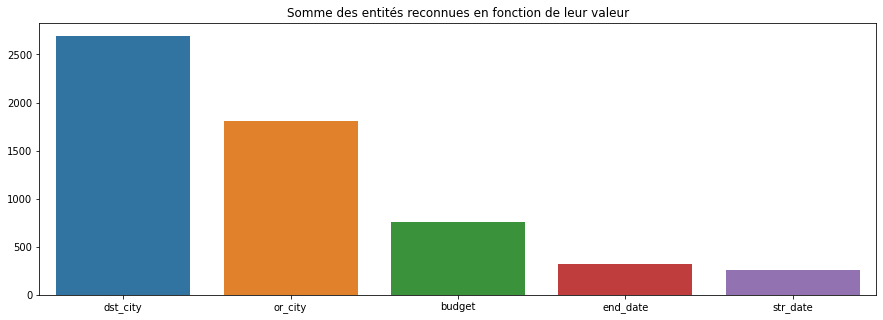

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


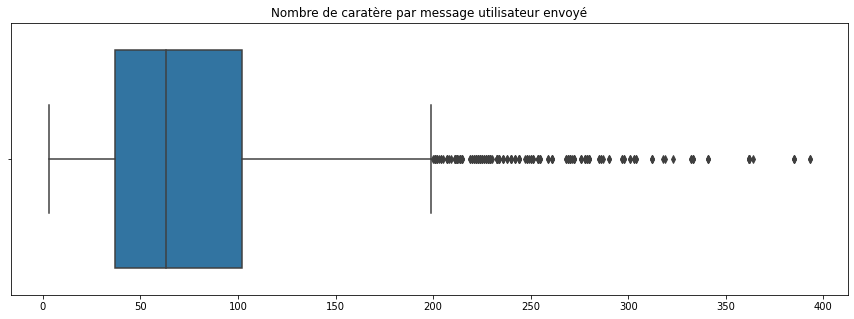

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

v = messages.entit.value_counts().values
i = messages.entit.value_counts().index

plt.figure(figsize=(15,5))
plt.title("Somme des entités reconnues en fonction de leur valeur")
sns.barplot(x=i,y=v)
plt.show()


plt.figure(figsize=(15,5))
plt.title("Nombre de caratère par message utilisateur envoyé")
sns.boxplot(messages.text.apply(lambda x: len(x)).values)
plt.show()

    
<b> Par la suite nous séparons notre jeu de données en plusieurs parties en vue de son entrainement/évaluation</b>
- Un jeu de données d'entrainement contenant uniquement des texts à entité unique
- Un jeu de données test contenant uniquement des texts à entité unique

Ces deux jeu d'entrainement nous permetrons d'évaluer en fonction des entités l'accuracy du modèle en fonction des entités.

- Un jeu de données test contenant des textes incluant chacune des entités.

Ce dernier jeu de données nous permettra de déterminer le pourcentage d'entité détecter par le modèle lorsque toutes les information sont présentes.

In [90]:
from sklearn.model_selection import train_test_split
def data_separation(df, df_):
    label = df.entit.unique()
    
    X_train , X_test = train_test_split(df)
    data = [X_test[X_test.entit == value][:50] for value in label]
    
    return X_train, X_test, data, df_[df_.entit_values.apply(lambda x: len(x)) == 5]

X_train, X_test, data, test_all_entit = data_separation(messages, df_)

print( len(X_train), len(X_test), len(data))
test_all_entit

4379 1460 5


,entit_values
text,
Fukuoka to Belo Horizonte. 6000. 9th to 17th.,"[str_date, or_city, end_date, dst_city, budget]"
"Hey, i want to go to rome from kochi. Can you find me some packages between september 2nd and 6th for 4300","[or_city, dst_city, budget, str_date, end_date]"
I wanna go on a vacation with my wife and 4 kids. our budget is 3300 and we want to travel between september 6th and 21st. We were looking at going to Denver from Dallas.,"[budget, dst_city, or_city, str_date, end_date]"
I want to go on a vacationg from september 18th to september 22nd to Monterrey from Curritiba for under 3100,"[str_date, dst_city, budget, or_city, end_date]"
"I want to go to Miami from Beijing between september 6th and 9th for 3500 and 5 adults altogether. The only thing I am flexible with is the price, if i need to I can increase it by 200","[budget, dst_city, or_city, str_date, end_date]"
I want to go to denver from frankfurt for under 2900 from september 8th to 13th,"[or_city, dst_city, budget, str_date, end_date]"
I would like to find a vacation between the 24th and 27th from San Francisco to Fort Lauderdale for 3800,"[str_date, dst_city, budget, or_city, end_date]"
I would like to go on a trip with my wife and 2 kids. Our budget is 3700 and we'd like to go between august 27th and september 10th. I've been thinking about going to Curitiba from Paris,"[budget, dst_city, or_city, str_date, end_date]"
I’m looking to book a vacation between september 18th and 22nd to Vitoria from North Vancouver for under 2700,"[str_date, dst_city, budget, or_city, end_date]"


Par la suite nous créons une liste de dictionnaire possédant le format type reconnu par le modèle LUIS, c'est-à-dire pour chaque message de notre jeu de données nous créons un dictionnaire ayant pour clés les valeurs :
- text : le texte du message,
- 'intentName': l'intention du message, dans notre cas il s'agit de la réservation d'un vol -> 'FlyMe.Booking'
- 'entityLabels': un dictionnaire localisant les entités dans le text :
    - 'entityLabels' : Nom de l'entité
    - 'start_char_index' : index du début de l'entité dans la phrase,
    - 'end_char_index' : index de la fin de l'entité dans la phrase,

In [12]:
# Fonction permettant de localiser les entités dans le text
def get_example_label(utterance, entity_name, value):
    """Build a EntityLabelObject.
    This will find the "value" start/end index in "utterance", and assign it to "entity name"
    """
    utterance = utterance.lower()
    value = value.lower()
    return {
        'entity_name': entity_name,
        'start_char_index': utterance.find(value),
        'end_char_index': utterance.find(value) + len(value)
    }

# Exemple de sortie pour le premier message du jeu de données
print(messages.text[0])
[get_example_label(messages.text.iloc[n], messages.entit.iloc[n], messages.val.iloc[n]) for n in range(3)]

I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.


[{'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 121},
 {'entity_name': 'dst_city', 'start_char_index': 27, 'end_char_index': 35},
 {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 48}]

In [14]:
# Fonction permettant de sortir le jeu de données sous format json en vu d'interpretation par le model Luois
def labeledExampleUtterance(data, intentName = "FlyMe_Booking"):
    
    data_Uterance = []
    for text in data.text.unique():
        data_temp = data[data.text == text][['entit','val']]
        data_json = {
            "text": text,
            "intentName": intentName,
            "entityLabels": [get_example_label(text, data_temp.entit.iloc[n], data_temp.val.iloc[n]) 
                             for n in range(len(data_temp))]
        }
        data_Uterance.append(data_json)
        
    return data_Uterance


# Exemple de sortie de fonction pour le jeu de données d'entrainement
labeledExampleUtteranceWithMLEntity = labeledExampleUtterance(X_train)
labeledExampleUtteranceWithMLEntity

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'intentName': 'FlyMe_Booking',
  'entityLabels': [{'entity_name': 'budget',
    'start_char_index': 117,
    'end_char_index': 121},
   {'entity_name': 'dst_city', 'start_char_index': 27, 'end_char_index': 35},
   {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 48}]},
 {'text': 'Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.',
  'intentName': 'FlyMe_Booking',
  'entityLabels': [{'entity_name': 'budget',
    'start_char_index': 114,
    'end_char_index': 118},
   {'entity_name': 'dst_city', 'start_char_index': 24, 'end_char_index': 33},
   {'entity_name': 'or_city', 'start_char_index': 39, 'end_char_index': 46}]},
 {'text': 'I have no flexibility for dates... but I can leave from Atlantis rather than Caprica. How about that?',
  'intentName': 'FlyMe_Booking',

La fonction "labeledExampleUtterance" nous permet donc de localiser des entités dans un text.

# 4. Création du Bot Fly Me 

Nous procédons par la suite à la création d'un bot à partir du framework de Microsoft Azure.

Les différentes parties présentées ici seront incorporées dans le fichier "Luis_bot" qui contiendra la class permmettant de :
- Créer un nouveau Bot
- Se connecter à un bot existant
- Configurer des entités et intention
- Envoyer des phrase d'exemple
- Entrainer le bot
- Publier le Bot
- Effectuer des prédiction
- Evaluer les performances du Bot.

## 4.1 Connexion et création d'un bot

In [15]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce

import json, time, uuid

authoringKey = '123007a9fbfb4ec2bd2e4cd7c88c37fa'
authoringEndpoint = 'https://languep10-authoring.cognitiveservices.azure.com/'
predictionKey = '75800c252f4246e9b665a9015f046091'
predictionEndpoint = 'https://langue-p10.cognitiveservices.azure.com/'


# We use a UUID to avoid name collisions.
appName = "Fly Me" #+ str(uuid.uuid4())
versionId = "0.1"
intentName = "FlyMe_Booking"


client = LUISAuthoringClient(authoringEndpoint, CognitiveServicesCredentials(authoringKey))

# define app basics
appDefinition = ApplicationCreateObject(name=appName, initial_version_id=versionId, culture='en-us')

# create app
app_id = client.apps.add(appDefinition)

# get app id - necessary for all other changes
print("Created LUIS app with ID {}".format(app_id))

client.model.add_intent(app_id, versionId, intentName)

Created LUIS app with ID fd24c90b-e679-4a4a-91d7-e0e3e35c8b13


'cfe81c74-1427-4702-9c13-72dc646472f9'

## 4.2 Création des intentions

In [16]:
mlEntityDefinition = ['or_city', 'dst_city','str_date','end_date', 'budget']

[client.model.add_entity(app_id, versionId, name=Entity) for Entity in mlEntityDefinition]

['a8aa1658-23c9-4c2c-8887-caba068057c2',
 'da8ddc3f-1203-4bdb-912c-6debf5e5c225',
 '289d24d8-a478-4495-b08f-9ada702d6647',
 '151e350f-bb22-489a-b7bf-71b9dcd3e42e',
 '1f1e9b82-e84b-4a98-b566-2ff0eac27405']

## 4.3 Envoi des examples de phrases avec entité

In [18]:
%%time
# Define labeled example

# Add an example for the entity.
# Enable nested children to allow using multiple models with the same name.
# The quantity subentity and the phraselist could have the same exact name if this is set to True
n = 0
for example in labeledExampleUtteranceWithMLEntity:
    try: client.examples.add(app_id, versionId, example)
    except : n+=1
print(n)

211
CPU times: user 3min 8s, sys: 17.5 s, total: 3min 25s
Wall time: 58min 2s


## Focus sur les dates

In [129]:
def get_example_label(utterance, entity_name, value):
    """Build a EntityLabelObject.
    This will find the "value" start/end index in "utterance", and assign it to "entity name"
    """
    utterance = utterance.lower()
    value = value.lower()
    return {
        'entity_name': entity_name,
        'start_char_index': utterance.find(value),
        'end_char_index': utterance.find(value) + len(value)+2
    }


df_end = messages[messages.entit == 'end_date']
df_end

,text,entit,val
145,I need to back by the 31st,end_date,31
472,"Ya for sure, not sure where, lets see what wou...",end_date,16
855,maybe the 15th of August until the 20th,end_date,20
1321,august 18th. until september 2nd,end_date,september 2
1625,can we book the one that returns on the 18th?,end_date,18
...,...,...,...
36682,S 20 to O 6,end_date,6
36707,Anytime between September 14 and 27 would be g...,end_date,27
36904,"Hi there, I'm looking to go to Brasilia betwee...",end_date,4
37113,Sept 12 and we all need to be back by the 1st,end_date,1


In [19]:
df_str = messages[messages.entit == 'start_date']
df_str

,text,entit,val


In [139]:
labeledExampleUtteranceWithMLEntity = labeledExampleUtterance(df_end)
labeledExampleUtteranceWithMLEntity

[{'text': 'yasssss. we are off aug 27-sept 5',
  'intentName': 'FlyMe.Booking',
  'entityLabels': [{'entity_name': 'end_date',
    'start_char_index': 27,
    'end_char_index': 35}]},
 {'text': 'on september 1st',
  'intentName': 'FlyMe.Booking',
  'entityLabels': [{'entity_name': 'end_date',
    'start_char_index': 3,
    'end_char_index': 16}]},
 {'text': "I'll be leaving from Santos, and ideally I'd like to be there between August 27 and 30.",
  'intentName': 'FlyMe.Booking',
  'entityLabels': [{'entity_name': 'end_date',
    'start_char_index': 84,
    'end_char_index': 88}]},
 {'text': 'i got a week off from august 27-september 3. i think i wanna take a ski trip to miami',
  'intentName': 'FlyMe.Booking',
  'entityLabels': [{'entity_name': 'end_date',
    'start_char_index': 32,
    'end_char_index': 45}]},
 {'text': 'Good afternoon. My husband and I would like to travel with our 6 kids. We have time off between August 15th and 19th. What can you offer for us?',
  'intentName': 'F

In [140]:
[bot.client.examples.add(bot.api_id, bot.versionId, example) for example in labeledExampleUtteranceWithMLEntity]

## 4.4 Entrainement du modèle Luis

In [20]:
client.train.train_version(app_id, versionId)
waiting = True
while waiting:
    info = client.train.get_status(app_id, versionId)

    # get_status returns a list of training statuses, one for each model. Loop through them and make sure all are done.
    waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
    if waiting:
        print ("Waiting 10 seconds for training to complete...")
        time.sleep(10)
    else: 
        print ("trained")
        waiting = False

Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
trained


## 4.5 Publication & appel du model

In [21]:
client.apps.update_settings(app_id, is_public=True)

responseEndpointInfo = client.apps.publish(app_id, versionId, is_staging=False)

responseEndpointInfo

## 4.6 Prediction

In [3]:
import pandas as pd
import numpy as np
import json

with open('../frames/frames.json') as f:
    df = json.load(f)
    
    
print(f'Le jeu de données contient {len(df)} conversations entre bot & utilisateur.')
df = [df[n] for n in range(len(df)) if n !=89 and n !=391]

#Liste des entités à reconnaitre
mlEntityDefinition = ['or_city', 'dst_city','str_date','end_date','budget']


# Création d'une fonction capable de récupérer l'ensemble des échanges 
# ainsi que des entités contenues dans ces échange
def collect_data(df,n):
    # Création d'une liste des textes accompagnés de leurs entités 
    base_data =[]
    
    # Sélection de n conversation du jeu de données
    for i in range(n):
        # Filtrage des réponses du bot
        data = [u for u in df[i]['turns'] if 'db' not in u.keys()]
        
        # Récupération des messages utilisateur avec leurs entités
        for messages in data: 
            text = messages['text']
            info = messages['labels']['frames'][-1]['info']
            [base_data.append((text, u,info[u][0]['val'])) for u in info.keys() if u in mlEntityDefinition]
     
    # Création d'un dataframe contenant le text l'entité et la valeur de l'entité
    base_data = pd.DataFrame(base_data, columns=['text', 'entit', 'val'])
    base_data.val = base_data.val.apply(lambda x: x.split('.')[0])
    
    # Filtre permettant de ne conserver uniquement les entité présent dans le text
    filtre = [base_data.val.values[n] in base_data.text.values[n] for n in range(len(base_data))]
    
    return base_data[filtre]

# Exemble de jeu de données pour les 8 premières conversions
messages = collect_data(df, len(df))
df_ = messages.groupby('text').agg(
    entit_values = ('entit', lambda x: list(x)),
)
messages

Le jeu de données contient 1369 conversations entre bot & utilisateur.


,text,entit,val
0,I'd like to book a trip to Atlantis from Capri...,budget,1700
1,I'd like to book a trip to Atlantis from Capri...,dst_city,Atlantis
2,I'd like to book a trip to Atlantis from Capri...,or_city,Caprica
4,"Yes, how about going to Neverland from Caprica...",budget,1900
5,"Yes, how about going to Neverland from Caprica...",dst_city,Neverland
...,...,...,...
37153,"Fine, if you're going to be like that... I gue...",or_city,Frankfurt
37156,Is 3.5 stars the best you can do? Are you seri...,dst_city,St
37167,I need to book a trip for the whole family fro...,or_city,Tampa
37169,"5 adults and 7 kids! Yup, the lot of us. We wa...",budget,32800


In [1]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce

import json, time, uuid

authoringKey = '123007a9fbfb4ec2bd2e4cd7c88c37fa'
authoringEndpoint = 'https://languep10-authoring.cognitiveservices.azure.com/'
predictionKey = '75800c252f4246e9b665a9015f046091'
predictionEndpoint = 'https://langue-p10.cognitiveservices.azure.com/'


# We use a UUID to avoid name collisions.
appName = "Fly Me" #+ str(uuid.uuid4())
versionId = "0.1"
intentName = "FlyMe_Booking"
app_id = 'fd24c90b-e679-4a4a-91d7-e0e3e35c8b13'

client = LUISAuthoringClient(authoringEndpoint, CognitiveServicesCredentials(authoringKey))

In [2]:
runtimeCredentials = CognitiveServicesCredentials(predictionKey)
clientRuntime = LUISRuntimeClient(endpoint=predictionEndpoint, credentials=runtimeCredentials)

# Production == slot name
predictionRequest = { "query" : "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700." }

predictionResponse = clientRuntime.prediction.get_slot_prediction(app_id, "Production", predictionRequest, show_all_intents=True)
print("Top intent: {}".format(predictionResponse.prediction.top_intent))
print("Sentiment: {}".format (predictionResponse.prediction.sentiment))
print("Intents: ")

for intent in predictionResponse.prediction.intents:
    print("\t{}".format (json.dumps (intent)))
print("Entities: {}".format (predictionResponse.prediction.entities))

Top intent: FlyMe_Booking
Sentiment: None
Intents: 
	"FlyMe_Booking"
	"None"
Entities: {'dst_city': ['Atlantis'], 'or_city': ['Caprica'], 'budget': ['1700.']}


In [144]:
predictionResponse.prediction.entities

{'dst_city': ['Atlantis'], 'or_city': ['Caprica'], 'budget': ['1700.']}

## 4.7 Scoring & Evaluation du modèle par entité

Dans un premier temps nous évaluons le pourcentage d'entitées détecter lorsqu'on envoie au modèle des phrase contenant l'ensemble des information nécessaire à la réservation d'un vol.

In [57]:
%%time 

# On créé ici une fonction qui retournent la liste des entité détectées dans une phrase
def pred(text):
    predictionRequest = { "query" : text}

    rep = clientRuntime.prediction.get_slot_prediction(app_id, 
                                                       "Production", 
                                                       predictionRequest, 
                                                       show_all_intents=True)
    return list(rep.prediction.entities.keys())

# Nous effectuons ici le calcul de pourcentage d'entité détecté.
rep = [pred(test_all_entit.index[n]) for  n in range(len(test_all_entit))]
moyen = np.array([len(u)/5*100 for u in rep]).mean()

print(f'En moyenne, lorsque toutes les entités sont contenu dans le text soumis au modele LUIS, {moyen}% des entités sont détectées.')
print()

En moyenne, lorsque toutes les entités sont contenu dans le text soumis au modele LUIS, 73.33333333333333% des entités sont détectées
CPU times: user 228 ms, sys: 31.6 ms, total: 260 ms
Wall time: 5.69 s


A présent nous voulons évaluer l'accuracty pour chacune des entités.

In [100]:
%%time
def scoring(data):
    label = X_test.entit.unique()
    score = []

    for n in range(len(label)):
        rep = data[n].text.apply(lambda x: pred(x))

        score.append(np.array([label[n] in u for u in  rep]).sum()/50*100)
        print(f'Score "{label[n]}" : {score[n]}%.')
        
    return score


score = scoring(data)

Score "dst_city" : 32.0%.
Score "or_city" : 38.0%.
Score "end_date" : 4.0%.
Score "budget" : 18.0%.
Score "str_date" : 80.0%.
CPU times: user 2.79 s, sys: 408 ms, total: 3.2 s
Wall time: 1min 21s


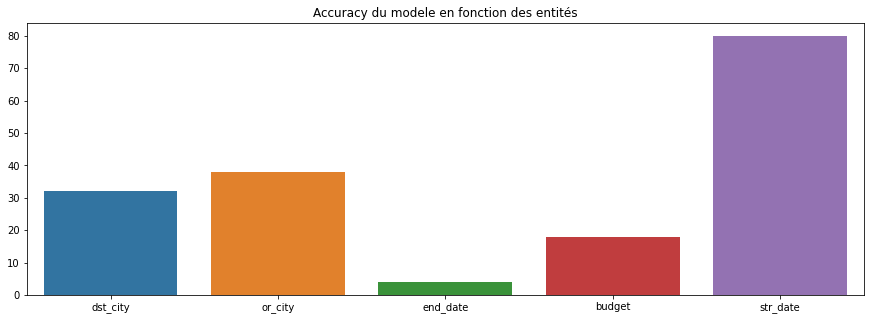

In [121]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('Accuracy du modele en fonction des entités')
sns.barplot(x= X_test.entit.unique(), y=score)
plt.show()

# 5 Microsoft Azure AppInsights : Monitoring des évenements

Nous dévellopons ici la liaisons avec le service de Microsoft AppInsights permettant de suivre les échange entre l'agent conversationnel et un utilisateur.

Plusieurs niveau d'alerte sont possible :
Level  |  Numeric value

- CRITICAL --> 50
- ERROR --> 40
- WARNING --> 30
- INFO --> 20
- DEBUG --> 10
- NOTSET --> 0

Le détail des seuil d'alerte sont présent dans le fichier "Méthodologie_pilotage_performance" qui accompagne de document.

In [19]:
import logging
from opencensus.ext.azure.log_exporter import AzureLogHandler

key = 'InstrumentationKey=adea8d73-a6d0-4c32-a83d-8e7f6380a431'


def connexion(key):
    logger = logging.getLogger(__name__)
    logger.addHandler(AzureLogHandler(
        connection_string=key)
    )
    return logger

# Fonction permettant d'envoyer des allerte de niveau info
def info(logger, message, dic=None):
    properties = {'custom_dimensions': dic}
    
    logger.setLevel(logging.INFO)
    logger.info(message, properties)
    
# Fonction permettant d'envoyer des allerte de niveau warning  
def warning(logger, message, dic=None):
    properties = {'custom_dimensions': dic}
    
    logger.setLevel(logging.WARNING)
    logger.warning(message, properties)
    
# Fonction permettant d'envoyer des allerte de niveau error  
def error(logger, message, dic=None):
    properties = {'custom_dimensions': dic}
    
    logger.setLevel(logging.ERROR)
    logger.error(message, properties)
    
# Fonction permettant d'envoyer des allerte de niveau critical  
def critical(logger, message, dic=None):
    properties = {'custom_dimensions': dic}
    
    logger.setLevel(logging.CRITICAL)
    logger.exception(message, extra=properties)

In [2]:
t = """I'd like to book a trip to Atlantis from 
Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."""

# 6 Construction du Pipeline 

Cette dernière partie est consacrée à la construction du pipline d'entretien du modèle LUIS à travers la création d'une class permettant de :
- créer ou se connecter à un modèle LUIS
- envoyer des phases d'exemple
- entrainer le modèle LUIS
- Publier le modèle LUIS
- Evaluer le modèle LUIS
- effectuer des prédictions

In [5]:
import json, time, uuid, logging, os, time, random

from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
from functools import reduce

from opencensus.ext.azure.log_exporter import AzureLogHandler
from sklearn.model_selection import train_test_split


class My_bot():
    def __init__(self, api_id = '9b0fd8a7-81ed-402c-a2a0-b534ee7d78cf', 
                 connection_string='InstrumentationKey=adea8d73-a6d0-4c32-a83d-8e7f6380a431'):
        
        self.connection_string = connection_string
        self.api_id = api_id
        self.logger = logging.getLogger(__name__)
        self.logger.addHandler(AzureLogHandler(connection_string=self.connection_string))
        
        self.authoringKey = '123007a9fbfb4ec2bd2e4cd7c88c37fa'
        self.authoringEndpoint = 'https://languep10-authoring.cognitiveservices.azure.com/'
        self.predictionKey = '75800c252f4246e9b665a9015f046091'
        self.predictionEndpoint = 'https://langue-p10.cognitiveservices.azure.com/'
        self.data_test = False

    # Création d'un Bot LUIS
    def create_bot(self, Bot_name:str, creat_entities=False):
        
        self.appName = Bot_name
        self.versionId = "0.1"
        self.intentName = "FlyMe_Booking"
        
        self.client = LUISAuthoringClient(self.authoringEndpoint, 
                                          CognitiveServicesCredentials(self.authoringKey))
        
        self.runtimeCredentials = CognitiveServicesCredentials(self.predictionKey)
        self.clientRuntime = LUISRuntimeClient(endpoint=self.predictionEndpoint, 
                                               credentials=self.runtimeCredentials)
        
        # define app basics
        self.appDefinition = ApplicationCreateObject(name=self.appName, 
                                                     initial_version_id=self.versionId, culture='en-us')
        self.api_id = self.client.apps.add(self.appDefinition)
        
        print('New botLUIS created !')
        if creat_entities:
            return self.creat_intentant()
        
        
    # Création des entités 
    def creat_intentant(self, mlEntityDefinition = ['or_city', 'dst_city','str_date','end_date', 'budget']):
        return [self.client.model.add_entity(self.api_id, 
                                             self.versionId, name=Entity) for Entity in mlEntityDefinition]
    
    # Envoie de phrase d'exemple au BotLUIS
    def send_example_sentance(self, data, split_train=False, start_train=False):
        """Le jeu de données data doit être un dataframe possédant trois colone:
        1. text : Le texte 
        2. entit : le label de l'entité présente dans le texte
        3. val : la valeur textuelle de l'entité
        """
        
        if split_train:
                data , self.data_test = train_test_split(data)
            
        
        # Fonction permettant de localiser les entités dans le text
        def get_example_label(utterance, entity_name, value):
            """Build a EntityLabelObject.
            This will find the "value" start/end index in "utterance", and assign it to "entity name"
            """
            utterance = utterance.lower()
            value = value.lower()
            return {
                'entity_name': entity_name,
                'start_char_index': utterance.find(value),
                'end_char_index': utterance.find(value) + len(value)
            }
        
        def labeledExampleUtterance(data, intentName = "FlyMe_Booking"):
    
            data_Uterance = []
            for text in data.text.unique():
                data_temp = data[data.text == text][['entit','val']]
                data_json = {
                    "text": text,
                    "intentName": intentName,
                    "entityLabels": [get_example_label(text, data_temp.entit.iloc[n], data_temp.val.iloc[n]) 
                                     for n in range(len(data_temp))]
                }
                data_Uterance.append(data_json)

            return data_Uterance
        
        labeledExampleUtteranceWithMLEntity = labeledExampleUtterance(data)
        n = 0
        for example in labeledExampleUtteranceWithMLEntity:
            try: client.examples.add(self.api_id, self.versionId, example)
            except : n+=1
        print('ExampleUtteranceWithMLEntity send successfully')
        print(f'Faill to send {n} example')
        
        if start_train:
            self.train_model()
        
    def train_model(self):
        self.client.train.train_version(self.api_id, self.versionId)
        waiting = True
        while waiting:
            info = self.client.train.get_status(self.api_id, self.versionId)

            waiting = any(map(lambda x: 'Queued' == x.details.status or 'InProgress' == x.details.status, info))
            if waiting:
                print ("Waiting 10 seconds for training to complete...")
                time.sleep(10)
            else: 
                print ("trained")
                waiting = False
                
    def publish(self):
        self.client.apps.update_settings(self.api_id, is_public=True)
        self.responseEndpointInfo = self.client.apps.publish(app_id, versionId, is_staging=False)
        

    def prediction(self, text:str):
        self.runtimeCredentials = CognitiveServicesCredentials(self.predictionKey)
        self.clientRuntime = LUISRuntimeClient(endpoint=self.predictionEndpoint, credentials=self.runtimeCredentials)

        # Production == slot name
        predictionRequest = { "query" : text }

        predictionResponse = self.clientRuntime.prediction.get_slot_prediction(self.api_id, 
                                                                               "Production", 
                                                                               predictionRequest, 
                                                                               show_all_intents=False)
        return predictionResponse.prediction.entities
    
    def scoring(self, data, set_=False):
        if set_==False and self.data_test:
            label = self.data_test.entit.unique()
            score = []

            for n in range(len(label)):
                rep = self.data_test[self.data_test.entit == label[n]].text.apply(lambda x: self.prediction(x))

                score.append(np.array([label[n] in u for u in  rep]).sum()/50*100)
                print(f'Score "{label[n]}" : {score[n]}%.')

            return score
        
        else:
            label = data.entit.unique()
            score = []

            for n in range(len(label)):
                rep = data[data.entit == label[n]].text.apply(lambda x: self.prediction(x))

                score.append(np.array([label[n] in u for u in  rep]).sum()/len(rep)*100)
                print(f'Score "{label[n]}" : {score[n]}%.')

            return score


    # Fonction permettant d'envoyer des allerte de niveau info
    def info(self, message, dic=None):
        properties = {'custom_dimensions': dic}

        self.logger.setLevel(logging.INFO)
        self.logger.info(message, properties)

    # Fonction permettant d'envoyer des allerte de niveau warning  
    def warning(self, message, dic=None):
        properties = {'custom_dimensions': dic}

        self.logger.setLevel(logging.WARNING)
        self.logger.warning(message, properties)

    # Fonction permettant d'envoyer des allerte de niveau error  
    def error(self, message, dic=None):
        properties = {'custom_dimensions': dic}

        self.logger.setLevel(logging.ERROR)
        self.logger.error(message, properties)

    # Fonction permettant d'envoyer des allerte de niveau critical  
    def critical(self, message, dic=None):
        properties = {'custom_dimensions': dic}

        self.logger.setLevel(logging.CRITICAL)
        self.logger.exception(message, extra=properties)


In [3]:
import pandas as pd
import numpy as np
import json

with open('./frames/frames.json') as f:
    df = json.load(f)
    
    
print(f'Le jeu de données contient {len(df)} conversations entre bot & utilisateur.')
df = [df[n] for n in range(len(df)) if n !=89 and n !=391]

#Liste des entités à reconnaitre
mlEntityDefinition = ['or_city', 'dst_city','str_date','end_date','budget']


# Création d'une fonction capable de récupérer l'ensemble des échanges 
# ainsi que des entités contenues dans ces échange
def collect_data(df,n):
    # Création d'une liste des textes accompagnés de leurs entités 
    base_data =[]
    
    # Sélection de n conversation du jeu de données
    for i in range(n):
        # Filtrage des réponses du bot
        data = [u for u in df[i]['turns'] if 'db' not in u.keys()]
        
        # Récupération des messages utilisateur avec leurs entités
        for messages in data: 
            text = messages['text']
            info = messages['labels']['frames'][-1]['info']
            [base_data.append((text, u,info[u][0]['val'])) for u in info.keys() if u in mlEntityDefinition]
     
    # Création d'un dataframe contenant le text l'entité et la valeur de l'entité
    base_data = pd.DataFrame(base_data, columns=['text', 'entit', 'val'])
    base_data.val = base_data.val.apply(lambda x: x.split('.')[0])
    
    # Filtre permettant de ne conserver uniquement les entité présent dans le text
    filtre = [base_data.val.values[n] in base_data.text.values[n] for n in range(len(base_data))]
    
    return base_data[filtre]

# Exemble de jeu de données pour les 8 premières conversions
messages = collect_data(df, len(df))
df_ = messages.groupby('text').agg(
    entit_values = ('entit', lambda x: list(x)),
)
messages

,text,entit,val
0,I'd like to book a trip to Atlantis from Capri...,budget,1700
1,I'd like to book a trip to Atlantis from Capri...,dst_city,Atlantis
2,I'd like to book a trip to Atlantis from Capri...,or_city,Caprica
4,"Yes, how about going to Neverland from Caprica...",budget,1900
5,"Yes, how about going to Neverland from Caprica...",dst_city,Neverland
...,...,...,...
37153,"Fine, if you're going to be like that... I gue...",or_city,Frankfurt
37156,Is 3.5 stars the best you can do? Are you seri...,dst_city,St
37167,I need to book a trip for the whole family fro...,or_city,Tampa
37169,"5 adults and 7 kids! Yup, the lot of us. We wa...",budget,32800


In [6]:
bot = My_bot()
messages[:9]

,text,entit,val
0,I'd like to book a trip to Atlantis from Capri...,budget,1700
1,I'd like to book a trip to Atlantis from Capri...,dst_city,Atlantis
2,I'd like to book a trip to Atlantis from Capri...,or_city,Caprica
4,"Yes, how about going to Neverland from Caprica...",budget,1900
5,"Yes, how about going to Neverland from Caprica...",dst_city,Neverland
6,"Yes, how about going to Neverland from Caprica...",or_city,Caprica
9,I have no flexibility for dates... but I can l...,dst_city,Atlantis
10,I have no flexibility for dates... but I can l...,or_city,Atlantis
16,"Hello, I am looking to book a vacation from Go...",or_city,Gotham City


In [4]:
bot.prediction('Booking from Paris to Madrid')

{'or_city': ['Paris'], 'dst_city': ['Madrid']}

In [37]:
messages[:9].text.apply(lambda x: bot.prediction(x)).values

array([{'dst_city': ['Atlantis'], 'or_city': ['Caprica'], 'budget': ['1700.']},
       {'dst_city': ['Atlantis'], 'or_city': ['Caprica'], 'budget': ['1700.']},
       {'dst_city': ['Atlantis'], 'or_city': ['Caprica'], 'budget': ['1700.']},
       {'dst_city': ['Neverland'], 'or_city': ['Caprica'], 'budget': ['1900.']},
       {'dst_city': ['Neverland'], 'or_city': ['Caprica'], 'budget': ['1900.']},
       {'dst_city': ['Neverland'], 'or_city': ['Caprica'], 'budget': ['1900.']},
       {'dst_city': ['Atlantis'], 'or_city': ['Atlantis']},
       {'dst_city': ['Atlantis'], 'or_city': ['Atlantis']},
       {'or_city': ['Gotham City'], 'dst_city': ['Mos Eisley'], 'budget': ['2100.']}],
      dtype=object)

In [30]:
bot.scoring(messages[:9])

Score "budget" : 100.0%.
Score "dst_city" : 100.0%.
Score "or_city" : 100.0%.


[100.0, 100.0, 100.0]